In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("StudentsPerformance_modified.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [4]:
df['math score']=pd.to_numeric(df['math score'],errors='coerce')

In [5]:
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')

In [6]:
df['math score'].fillna(df['math score'].mean(),inplace=True,axis=0)
df['reading score'].fillna(df['reading score'].mean(),inplace=True, axis=0)
df['writing score'].fillna(df['writing score'].mean(),inplace=True, axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

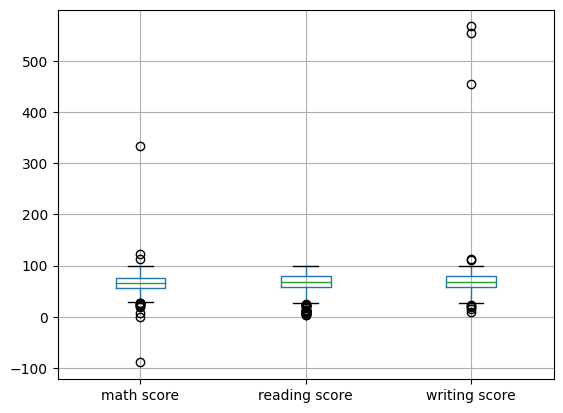

In [9]:
df.boxplot()

In [10]:
df['math score']=df['math score'].astype(int)
df['reading score']=df['reading score'].astype(int)
df['writing score']=df['writing score'].astype(int)

In [11]:
q1=df.quantile(q=0.25,  numeric_only=True)
q1
q3=df.quantile(q=0.75,numeric_only=True)
q3

math score       76.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64

In [12]:
IQR=q3-q1
IQR

math score       19.0
reading score    21.0
writing score    21.0
dtype: float64

In [13]:
LL=q1-(IQR*1.5)
UL=q3+(IQR*1.5)
UL

math score       104.5
reading score    110.5
writing score    110.5
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
LD=df[['math score','reading score','writing score']]< LL
LD

,math score,reading score,writing score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [16]:
UD=df[['math score','reading score','writing score']] > UL

In [17]:
df[(LD | UD)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
out=df[~(LD | UD).any(axis=1)]

In [19]:
out

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [20]:
df.boxplot()

<Axes: >